### Read omnibaord data

In [1]:
import pandas as pd
import pymongo
import numpy as np
from collections import OrderedDict
import json
import matplotlib.pyplot as plt

from bson import ObjectId

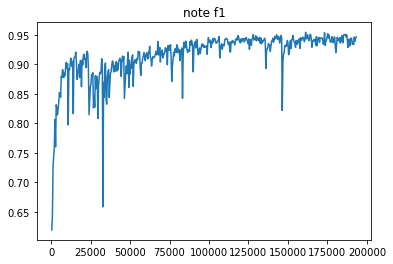

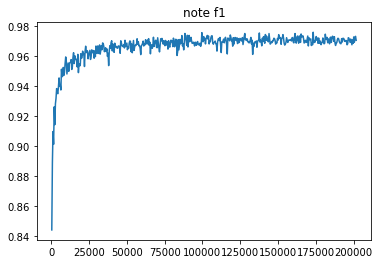

In [37]:

 
myclient = pymongo.MongoClient("mongodb://10.177.55.66:7000/")
mydb = myclient["piano_transcription"]
runs = mydb['runs']

q = {'_id':{'$in':[9,11,]}} #  
res = runs.find(q)
for i in res:
    metrics_info = i['info']['metrics']
    # print(metrics_info)
    for info in metrics_info:
        name = info['name']
        _id = info['id']
        if(name.find('/note/f1') >= 0):
            # print(_id)
            metric = mydb['metrics'].find({'_id': ObjectId(_id)})
            print(metric)
            for item in metric:
                steps = item['steps']
                values = item['values']
                plt.figure()
                plt.title('note f1')
                plt.plot(steps, values)
            

### Read tensorboard data

In [3]:
from tensorboard.backend.event_processing import event_accumulator
import argparse
import pandas as pd
from tqdm import tqdm


def save_tensorboard_log(logdir, out_path):

    # load log data
    # parser = argparse.ArgumentParser(description='Export tensorboard data')
    # parser.add_argument('--in-path', type=str, required=True, help='Tensorboard event files or a single tensorboard '
    #                                                                'file location')
    # parser.add_argument('--ex-path', type=str, required=True, help='location to save the exported data')

    # args = parser.parse_args()
    event_data = event_accumulator.EventAccumulator(logdir)  # a python interface for loading Event data
    event_data.Reload()  # synchronously loads all of the data written so far b
    # print(event_data.Tags())  # print all tags
    keys = event_data.scalars.Keys()  # get all tags,save in a list
    # print(keys)
    df = pd.DataFrame(columns=keys[1:])  # my first column is training loss per iteration, so I abandon it
    for key in tqdm(keys):
        # print(key)
        if key != 'train/total_loss_iter':  # Other attributes' timestamp is epoch.Ignore it for the format of csv file
            df[key] = pd.DataFrame(event_data.Scalars(key)).value

    df.to_csv(out_path)

    print("Tensorboard data exported successfully")


save_tensorboard_log('results/1.proposed', 'results/1.csv')
save_tensorboard_log('results/2.FB-RNN -> RNN', 'results/2.csv')
save_tensorboard_log('results/3.without FB-RNN', 'results/3.csv')
save_tensorboard_log('results/4.without HD-Conv', 'results/4.csv')


In [2]:
import pandas as pd

df = pd.read_csv('results/1.csv')
df.head(10)

,Unnamed: 0,loss/onset,loss/frame,loss/velocity,validation/loss/onset,validation/loss/frame,validation/loss/velocity,validation/metric/onsets/recall,validation/metric/onsets/precision,validation/metric/onsets/f1,...,validation/metric/frame/false_alarm_error,validation/metric/frame/total_error,validation/metric/frame/chroma_precision,validation/metric/frame/chroma_recall,validation/metric/frame/chroma_accuracy,validation/metric/frame/chroma_substitution_error,validation/metric/frame/chroma_miss_error,validation/metric/frame/chroma_false_alarm_error,validation/metric/frame/chroma_total_error,loss
0,0,0.268638,0.308180,0.032076,0.008284,0.074206,0.014436,0.767203,0.953677,0.844923,...,0.036740,0.466820,0.918556,0.581094,0.548863,0.020190,0.398716,0.036740,0.455646,0.608893
1,1,0.080871,0.111466,0.015807,0.006898,0.047356,0.012608,0.840695,0.953578,0.890544,...,0.081822,0.295526,0.886598,0.796719,0.722256,0.026054,0.177226,0.081822,0.285102,0.208144
2,2,0.054908,0.102994,0.015604,0.006269,0.054061,0.010499,0.874992,0.957288,0.911043,...,0.194774,0.319010,0.811408,0.887262,0.733916,0.027195,0.085543,0.194774,0.307512,0.173506
3,3,0.030377,0.087440,0.019488,0.006738,0.052645,0.008525,0.844257,0.979765,0.902957,...,0.063813,0.305504,0.900512,0.766156,0.704894,0.025615,0.208229,0.063813,0.297657,0.137305
4,4,0.032625,0.129058,0.021349,0.005595,0.053290,0.006898,0.894508,0.966756,0.927361,...,0.063825,0.250346,0.911773,0.820888,0.760281,0.019709,0.159403,0.063825,0.242937,0.183032
5,5,0.034170,0.070389,0.015931,0.005577,0.045678,0.006388,0.857272,0.987322,0.914920,...,0.034377,0.297024,0.940210,0.743026,0.708961,0.014596,0.242378,0.034377,0.291351,0.120490
6,6,0.020457,0.045347,0.009283,0.005735,0.040127,0.006549,0.913917,0.948086,0.929455,...,0.060989,0.240433,0.914845,0.826713,0.767438,0.018520,0.154767,0.060989,0.234276,0.075088
7,7,0.022836,0.054996,0.021102,0.005271,0.051838,0.008163,0.891445,0.983334,0.933074,...,0.181010,0.311745,0.835684,0.876578,0.740568,0.018773,0.104649,0.181010,0.304432,0.098934
8,8,0.028980,0.091875,0.020420,0.004887,0.038430,0.006308,0.901611,0.984076,0.939130,...,0.093152,0.219828,0.894560,0.878068,0.794934,0.016201,0.105731,0.093152,0.215084,0.141275
9,9,0.021598,0.069388,0.020257,0.005678,0.035446,0.006486,0.898831,0.983650,0.937283,...,0.070669,0.219707,0.911546,0.856770,0.791627,0.015504,0.127726,0.070669,0.213899,0.111243


### Evluate


In [1]:
checkpoint_path = '/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/model-100000.pt'

In [3]:
import os
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/56/src'

os.chdir(pwd)

In [5]:
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/56/src


In [24]:
# %%capture capt
!python evaluate.py ../../model-100000.pt MAESTRO test

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0107 seconds
CQT kernels created, time used = 0.3121 seconds
Loading 1 group of MAESTRO at /home/fd-lamt-02/2T/vvx/piano_transcription/data/maestro-v3.0.0
Loading group test: 100%|█████████████████| 125/125 [00:00<00:00, 208630.32it/s]
HARPIST(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): CNNTrunk(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_st

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [25]:
# capt.stdout

In [26]:
# !ls -hl /home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/model-100000-test | grep '.h5'

In [31]:
import pandas as pd
df = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220427-092150_conversions/model-100000_evaluate/MAESTRO/test/metrics_result.csv')
df.head()

,Unnamed: 0,on/recall,on/precision,on/f1,note/precision,note/recall,note/f1,note/overlap,note-off/precision,note-off/recall,...,frame/false_alarm_error,frame/total_error,frame/chroma_precision,frame/chroma_recall,frame/chroma_accuracy,frame/chroma_substitution_error,frame/chroma_miss_error,frame/chroma_false_alarm_error,frame/chroma_total_error,path
0,0,tensor(0.9263),tensor(0.9451),tensor(0.9356),0.941720,0.925170,0.933371,0.875933,0.809002,0.794785,...,0.062937,0.153838,0.920062,0.912560,0.845522,0.016349,0.071090,0.062937,0.150376,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
1,1,tensor(0.9479),tensor(0.9649),tensor(0.9563),0.964286,0.947368,0.955752,0.868927,0.803571,0.789474,...,0.053027,0.152347,0.929556,0.904802,0.846743,0.015541,0.079657,0.053027,0.148225,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
2,2,tensor(0.8859),tensor(0.9428),tensor(0.9134),0.938425,0.881758,0.909209,0.709692,0.728466,0.684477,...,0.071358,0.233105,0.906064,0.846452,0.778164,0.016398,0.137150,0.071358,0.224906,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
3,3,tensor(0.9909),tensor(0.9850),tensor(0.9879),0.985034,0.990876,0.987946,0.787326,0.874376,0.879562,...,0.031050,0.171994,0.957073,0.860998,0.828985,0.007567,0.131434,0.031050,0.170052,MIDI-Unprocessed_SMF_17_R1_2004_01-02_ORIG_MID...
4,4,tensor(0.9557),tensor(0.9638),tensor(0.9597),0.963298,0.955169,0.959216,0.737814,0.717553,0.711498,...,0.096991,0.220670,0.885373,0.877172,0.787715,0.016574,0.106254,0.096991,0.219819,MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORIG_MID...


In [39]:
# df.columns

In [38]:
df_1 = df[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1', 'path']]
(df_1.head()*100).round(1)

,note/precision,note/recall,note/f1,frame/precision,frame/recall,frame/f1,path
0,94.2,92.5,93.3,91.7,90.9,91.3,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
1,96.4,94.7,95.6,92.5,90.1,91.3,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
2,93.8,88.2,90.9,89.7,83.8,86.7,MIDI-Unprocessed_SMF_16_R1_2004_01-08_ORIG_MID...
3,98.5,99.1,98.8,95.5,85.9,90.4,MIDI-Unprocessed_SMF_17_R1_2004_01-02_ORIG_MID...
4,96.3,95.5,95.9,88.5,87.6,88.0,MIDI-Unprocessed_SMF_17_R1_2004_03-06_ORIG_MID...


### Baseline


In [4]:
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/baseline/transcriber-220428-111900_stump_100%/63/src'
os.chdir(pwd)
!pwd


/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220428-111900_stump/63/src


In [63]:
!python evaluate.py ../../model-200000.pt MAESTRO test --onset-threshold 0.5 --frame-threshold 0.5

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0099 seconds
CQT kernels created, time used = 0.2849 seconds
Loading 1 group of MAESTRO at /home/fd-lamt-02/2T/vvx/piano_transcription/data/maestro-v3.0.0
Loading group test: 100%|██████████████████| 125/125 [00:00<00:00, 51674.35it/s]
OnsetsAndFrames(
  (onset_stack): Sequential(
    (0): ConvStack(
      (cnn): Sequential(
        (0): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 480 params
        (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 96 params
        (2): ReLU(), 0 params
        (3): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 20,784 params
        (4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 96 params
        (5): ReLU(), 0 params
        (6): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, c

In [25]:
def get_mean_metrics(csv_path):
    df = pd.read_csv(csv_path)
    # print(df.columns)
    df = df[[
        'note/precision','note/recall', 'note/f1', 
        'frame/precision', 'frame/recall', 'frame/f1', 
        'note-off/precision','note-off/recall', 'note-off/f1', 
        'note-off-vel/precision', 'note-off-vel/recall', 'note-off-vel/f1',
        'path']]
    return (df.mean(axis=0) * 100).round(2)
csv_path = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/baseline/transcriber-220428-111900_stump_100%/model-200000_evaluate/MAESTRO/test/metrics_result.csv'
get_mean_metrics(csv_path)

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            99.10
note/recall               89.55
note/f1                   94.02
frame/precision           94.49
frame/recall              84.16
frame/f1                  88.96
note-off/precision        82.80
note-off/recall           74.96
note-off/f1               78.63
note-off-vel/precision    81.37
note-off-vel/recall       73.71
note-off-vel/f1           77.30
dtype: float64

In [92]:
csv_path = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/baseline/transcriber-220428-111900_stump_100%/model-200000_evaluate/MAESTRO/test/metrics_result_0.4_0.5.csv'
get_mean_metrics(csv_path)

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            98.67
note/recall               92.08
note/f1                   95.22
frame/precision           94.43
frame/recall              85.50
frame/f1                  89.68
note-off/precision        82.25
note-off/recall           76.88
note-off/f1               79.44
note-off-vel/precision    80.80
note-off-vel/recall       75.55
note-off-vel/f1           78.05
dtype: float64

#### Test on MAPS

In [6]:
!python evaluate.py ../../model-200000.pt MAPS --onset-threshold 0.5 --frame-threshold 0.5

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0105 seconds
CQT kernels created, time used = 0.3158 seconds
Loading 2 groups of MAPS at /home/fd-lamt-02/2T/vvx/piano_transcription/data/MAPS
Loading group ENSTDkCl: 100%|███████████████████| 30/30 [00:06<00:00,  4.98it/s]
OnsetsAndFrames(
  (onset_stack): Sequential(
    (0): ConvStack(
      (cnn): Sequential(
        (0): Conv2d(1, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 480 params
        (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 96 params
        (2): ReLU(), 0 params
        (3): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 20,784 params
        (4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 96 params
        (5): ReLU(), 0 params
        (6): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=Fal

In [9]:
csv_path = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/baseline/transcriber-220428-111900_stump_100%/model-200000_evaluate/MAPS/default/metrics_result.csv'
get_mean_metrics(csv_path)

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            81.88
note/recall               77.49
note/f1                   79.52
frame/precision           90.96
frame/recall              64.28
frame/f1                  75.04
note-off/precision        49.98
note-off/recall           47.38
note-off/f1               48.59
note-off-vel/precision    46.41
note-off-vel/recall       44.02
note-off-vel/f1           45.13
dtype: float64

### Ablation Study
#### 1.Proposed

In [81]:
import os
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
from onsets_and_frames.midi import parse_midi

In [ ]:
# onset, frame, offset, velocity
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/11/src'
os.chdir(pwd)

In [2]:
# proposed
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/11/src'
os.chdir(pwd)

In [28]:
img_path = pwd + '../../' + 'model-200000_evaluate/MAESTRO/test/' + \
'MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac' + \
    '.overlap.note_recall*.png'
print(img_path)
# results/ablation_study/1.proposed/model-200000_evaluate/MAESTRO/test/MIDI-Unprocessed_08_R1_2009_01-04_ORIG_MID--AUDIO_08_R1_2009_08_R1_2009_02_WAV.flac.overlap.note_recall0.9673.png

/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/11/src../../model-200000_evaluate/MAESTRO/test/MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac.overlap.note_recall*.png


In [34]:
# ! cp /home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/model-200000_evaluate/MAESTRO/test/MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac.overlap.note_recall*.png /home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/

In [ ]:
# 保存每个wav的结果到 csv
# loss.item
# offset loss 的有无
# unexpected keyword argument 'device'

# to_cqt.to(device)
# frame和vel的upsample  onset_pred.size()[-2:]
# train 和 eval时， self.frame_num没对上，forward()，run_on_batch()


In [82]:
midi_files = glob('/home/fd-lamt-02/2T/Datasets/mt/MAPS/midi/*.mid')

for midi_path in tqdm(midi_files):
    tsv_filename = midi_path.replace('.midi', '.tsv').replace('.mid', '.tsv')
    if not os.path.exists(tsv_filename):
        midi = parse_midi(midi_path)
        np.savetxt(tsv_filename, midi, fmt='%.6f', delimiter='\t', header='onset,offset,note,velocity')

100%|██████████| 270/270 [01:21<00:00,  3.30it/s]


In [85]:
# !python evaluate.py ../../model-200000.pt MAESTRO test
!python evaluate.py ../../model-200000.pt --frame-threshold 0.3 --onset-threshold 0.4

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0097 seconds
CQT kernels created, time used = 0.2359 seconds
Loading 2 groups of MAPS at /home/fd-lamt-02/2T/vvx/piano_transcription/data/MAPS
Loading group ENSTDkCl: 100%|███████████████| 30/30 [00:00<00:00, 224694.86it/s]
OnsetsAndFrames(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): HarmonicDilatedConv(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_run

In [26]:
# MAESTRO
get_mean_metrics('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/model-200000_evaluate/MAESTRO/test/metrics_result.csv')

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            98.49
note/recall               95.25
note/f1                   96.82
frame/precision           93.51
frame/recall              91.46
frame/f1                  92.43
note-off/precision        83.67
note-off/recall           80.97
note-off/f1               82.28
note-off-vel/precision    80.25
note-off-vel/recall       77.70
note-off-vel/f1           78.94
dtype: float64

In [70]:
# MAESTRO test 
# tunnel 
get_mean_metrics('runs/transcriber-220502-142044_tunnels/model-154000_evaluate/MAESTRO/test/metrics_result.csv')

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            98.12
note/recall               95.59
note/f1                   96.83
frame/precision           90.50
frame/recall              94.11
frame/f1                  92.21
note-off/precision        80.85
note-off/recall           78.81
note-off/f1               79.80
note-off-vel/precision    79.63
note-off-vel/recall       77.64
note-off-vel/f1           78.61
dtype: float64

In [71]:
# MAPS
get_mean_metrics('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/model-200000_evaluate/MAPS/default/metrics_result.csv')

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            88.42
note/recall               86.81
note/f1                   87.56
frame/precision           91.61
frame/recall              82.38
frame/f1                  86.63
note-off/precision        65.01
note-off/recall           63.84
note-off/f1               64.39
note-off-vel/precision    60.35
note-off-vel/recall       59.26
note-off-vel/f1           59.77
dtype: float64

#### results on training set

In [16]:
df = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/model-200000_evaluate/MAESTRO/train/metrics_result.csv')

In [59]:
# make training set 10%
df.head()
print(len(df))
df_10p = df.sort_values('note/f1').head(95)[['note/f1', 'path']]
train_10_list = [os.path.splitext(path)[0] for path in df_10p['path']]
print(len(train_10_list),train_10_list)

os.path 



953
95 ['MIDI-Unprocessed_07_R1_2008_01-04_ORIG_MID--AUDIO_07_R1_2008_wav--3', 'MIDI-UNPROCESSED_04-08-12_R3_2014_MID--AUDIO_04_R3_2014_wav--1', 'MIDI-UNPROCESSED_04-08-12_R3_2014_MID--AUDIO_04_R3_2014_wav--2', 'MIDI-UNPROCESSED_14-15_R1_2014_MID--AUDIO_15_R1_2014_wav--5', 'MIDI-UNPROCESSED_09-10_R1_2014_MID--AUDIO_09_R1_2014_wav--2', 'MIDI-UNPROCESSED_21-22_R1_2014_MID--AUDIO_22_R1_2014_wav--4', 'MIDI-Unprocessed_11_R1_2009_06-09_ORIG_MID--AUDIO_11_R1_2009_11_R1_2009_09_WAV', 'MIDI-Unprocessed_07_R1_2008_01-04_ORIG_MID--AUDIO_07_R1_2008_wav--4', 'MIDI-Unprocessed_22_R1_2011_MID--AUDIO_R1-D8_11_Track11_wav', 'MIDI-Unprocessed_XP_18_R1_2004_01-02_ORIG_MID--AUDIO_18_R1_2004_05_Track05_wav', 'MIDI-Unprocessed_XP_15_R1_2004_04_ORIG_MID--AUDIO_15_R1_2004_04_Track04_wav', 'MIDI-Unprocessed_20_R1_2011_MID--AUDIO_R1-D8_03_Track03_wav', 'MIDI-Unprocessed_05_R1_2009_01-02_ORIG_MID--AUDIO_05_R1_2009_05_R1_2009_02_WAV', 'MIDI-Unprocessed_07_R1_2006_01-04_ORIG_MID--AUDIO_07_R1_2006_04_Track04_wav',

#### 2.FB-RNN -> RNN

In [54]:
# proposed
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN -> RNN/33/src'
#
os.chdir(pwd)
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220422-220150_wins/33/src


In [51]:
!ls /home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN\ ->\ RNN/model-200000_evaluate/MAESTRO/test/

/bin/bash:  RNN/model-200000_evaluate/MAESTRO/test/: 没有那个文件或目录


In [52]:
!ls /home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN\ -\>\ RNN/model-200000_evaluate/MAESTRO/test/MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac.overlap.note_recall*.png

'/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN -> RNN/model-200000_evaluate/MAESTRO/test/MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac.overlap.note_recall0.9551.png'


In [53]:
! cp /home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN\ -\>\ RNN/model-200000_evaluate/MAESTRO/test/MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac.overlap.note_recall*.png /home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/

In [73]:

# !python evaluate.py ../../model-200000.pt MAESTRO test

In [12]:
get_mean_metrics('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN -> RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')

125


/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


note/precision     0.978972
note/recall        0.940647
note/f1            0.959177
frame/precision    0.947088
frame/recall       0.840605
frame/f1           0.889943
dtype: float64

In [20]:
df_diff = df_1[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1']] - \
    df_2[['note/precision','note/recall', 'note/f1', 'frame/precision', 'frame/recall', 'frame/f1']]
df_diff.insert(6, 'path', df_1['path'])

In [26]:
df_diff_sort = df_diff.sort_values('frame/f1')
print(list(df_diff_sort['path'][-5:]))
df_diff_sort.tail()

# MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac

['MIDI-Unprocessed_17_R1_2008_01-04_ORIG_MID--AUDIO_17_R1_2008_wav--4.flac', 'MIDI-Unprocessed_053_PIANO053_MID--AUDIO-split_07-06-17_Piano-e_3-04_wav--2.flac', 'MIDI-Unprocessed_15_R1_2009_03-06_ORIG_MID--AUDIO_15_R1_2009_15_R1_2009_05_WAV.flac', 'MIDI-Unprocessed_09_R2_2011_MID--AUDIO_R2-D3_03_Track03_wav.flac', 'MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AUDIO_12_R3_2008_wav--3.flac']


,note/precision,note/recall,note/f1,frame/precision,frame/recall,frame/f1,path
40,0.004672,-0.003988,0.000108,-0.000540,0.110033,0.062906,MIDI-Unprocessed_17_R1_2008_01-04_ORIG_MID--AU...
114,0.008632,0.004032,0.006283,-0.009336,0.121808,0.064998,MIDI-Unprocessed_053_PIANO053_MID--AUDIO-split...
57,0.003686,0.003568,0.003626,-0.003995,0.110100,0.065357,MIDI-Unprocessed_15_R1_2009_03-06_ORIG_MID--AU...
61,0.008417,0.015025,0.012089,-0.009474,0.123989,0.069444,MIDI-Unprocessed_09_R2_2011_MID--AUDIO_R2-D3_0...
35,0.004179,0.008814,0.006584,-0.007316,0.138893,0.075396,MIDI-Unprocessed_12_R3_2008_01-04_ORIG_MID--AU...


#### 3.without FB-RNN

In [74]:
pwd = "/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/36/src"
os.chdir(pwd)
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220422-023304_HD-Conv[onset_frame_vel_sep_0413,no_LSTM,weighted_loss_2,LSTM,maestro-v3]/36/src


In [78]:
# 
!python evaluate.py ../../model-200000.pt MAESTRO test

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0115 seconds
CQT kernels created, time used = 0.2948 seconds
Loading 1 group of MAESTRO at /home/fd-lamt-02/2T/vvx/piano_transcription/data/maestro-v3.0.0
Loading group test: 100%|█████████████████| 125/125 [00:00<00:00, 213646.29it/s]
OnsetsAndFrames(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): HarmonicDilatedConv(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=Fals

In [79]:
df_3 = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')
get_mean_metrics('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')

125


,note/precision,note/recall,note/f1,frame/precision,frame/recall,frame/f1,path
120,98.63,94.46,96.50,97.90,80.49,88.34,MIDI-Unprocessed_071_PIANO071_MID--AUDIO-split...
121,98.20,94.70,96.42,96.27,78.43,86.44,MIDI-Unprocessed_078_PIANO078_MID--AUDIO-split...
122,96.96,89.67,93.17,96.56,82.99,89.26,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
123,96.79,90.66,93.62,97.35,73.47,83.74,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
124,96.17,89.29,92.60,95.47,80.45,87.32,MIDI-Unprocessed_080_PIANO080_MID--AUDIO-split...


#### 4.without HD-Conv

In [1]:
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/4.without HD-Conv/34/src'
os.chdir(pwd)
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220423-004553_diagrams/34/src


In [ ]:
# 保存每个wav的结果到 csv
# loss.item
# offset loss 的有无
# unexpected keyword argument 'device'

# to_cqt.to(device)
# frame和vel的upsample  onset_pred.size()[-2:]
# train 和 eval时， self.frame_num没对上，forward()，run_on_batch()

In [2]:
!python evaluate.py ../../model-200000.pt MAESTRO test

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0176 seconds
CQT kernels created, time used = 0.3128 seconds
Loading 1 group of MAESTRO at /home/fd-lamt-02/2T/vvx/piano_transcription/data/maestro-v3.0.0
Loading group test: 100%|█████████████████| 125/125 [00:00<00:00, 217908.56it/s]
OnsetsAndFrames(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): CNNTrunk(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_ru

In [5]:
df_4 = pd.read_csv('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')
get_mean_metrics('/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/model-200000_evaluate/MAESTRO/test/metrics_result.csv')

125


,note/precision,note/recall,note/f1,frame/precision,frame/recall,frame/f1,path
120,98.63,94.46,96.50,97.90,80.49,88.34,MIDI-Unprocessed_071_PIANO071_MID--AUDIO-split...
121,98.20,94.70,96.42,96.27,78.43,86.44,MIDI-Unprocessed_078_PIANO078_MID--AUDIO-split...
122,96.96,89.67,93.17,96.56,82.99,89.26,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
123,96.79,90.66,93.62,97.35,73.47,83.74,MIDI-Unprocessed_079_PIANO079_MID--AUDIO-split...
124,96.17,89.29,92.60,95.47,80.45,87.32,MIDI-Unprocessed_080_PIANO080_MID--AUDIO-split...


#### Compare Piano Roll

In [33]:
import matplotlib.pyplot as plt
from glob import glob
from shutil import copyfile
pic_dir_lst =  [
    '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/1.proposed/model-200000_evaluate/MAESTRO/test/',
    '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/2.FB-RNN -> RNN/model-200000_evaluate/MAESTRO/test/',
    '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/3.without FB-RNN/model-200000_evaluate/MAESTRO/test/',
    '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/4.without HD-Conv/model-200000_evaluate/MAESTRO/test/'
]
compare_dir = '/home/fd-lamt-02/vvx/piano_transcription_0412/results/ablation_study/piano_roll/'


In [41]:
d = 'overlap.note_recall'
for i in range(len(pic_dir_lst)):
    new_dir = os.path.join(compare_dir, str(i+1))
    os.makedirs(new_dir, exist_ok=True)
    dir_path = pic_dir_lst[i]
    png_list = glob(dir_path + '*.png')
    cnt = 0
    for img in png_list:
        root, name = os.path.split(img)
        if(name.find(d) > 0):
            cnt += 1
            pos = name.find(d) + len(d)
            new_name = name[:pos] + '.png'
            new_img = os.path.join(new_dir, new_name)
            copyfile(img, new_img)
    print('png num:', cnt)

s = 'MIDI-Unprocessed_01_R1_2009_01-04_ORIG_MID--AUDIO_01_R1_2009_01_R1_2009_01_WAV.flac.overlap.note_recall0.9939.png'


png num: 250
png num: 250
png num: 250
png num: 250


In [46]:
# concat the png
png_list = glob(os.path.join(compare_dir,'1', '*.png'))
concat_dir = compare_dir + '/concat'

for img_1 in png_list:
    root, name = os.path.split(img_1)
    img_2 = os.path.join(root, '../2/', name)
    img_3 = os.path.join(root, '../3/', name)
    img_4 = os.path.join(root, '../4/', name)
    img_concat = os.path.join(root, '../concat/', name)
    np1 = plt.imread(img_1)
    np2 = plt.imread(img_2)
    np3 = plt.imread(img_3)
    np4 = plt.imread(img_4)
    # print('np1.shape', np1.shape)
    np_concat = np.concatenate([np1, np2, np3, np4], axis=0)
    plt.imsave(img_concat, np_concat)




np1.shape (88, 60353, 3)
np1.shape (88, 9159, 3)
np1.shape (88, 11988, 3)
np1.shape (88, 3358, 3)
np1.shape (88, 15637, 3)
np1.shape (88, 6687, 3)
np1.shape (88, 79364, 3)
np1.shape (88, 29578, 3)
np1.shape (88, 38845, 3)
np1.shape (88, 14446, 3)
np1.shape (88, 15813, 3)
np1.shape (88, 17739, 3)
np1.shape (88, 8796, 3)
np1.shape (88, 14993, 3)
np1.shape (88, 14377, 3)
np1.shape (88, 11077, 3)
np1.shape (88, 28447, 3)
np1.shape (88, 6995, 3)
np1.shape (88, 20197, 3)
np1.shape (88, 18465, 3)
np1.shape (88, 10585, 3)
np1.shape (88, 21931, 3)
np1.shape (88, 14661, 3)
np1.shape (88, 17772, 3)
np1.shape (88, 37002, 3)
np1.shape (88, 56008, 3)
np1.shape (88, 20197, 3)
np1.shape (88, 8596, 3)
np1.shape (88, 19102, 3)
np1.shape (88, 15217, 3)
np1.shape (88, 26450, 3)
np1.shape (88, 71394, 3)
np1.shape (88, 10947, 3)
np1.shape (88, 17825, 3)
np1.shape (88, 17670, 3)
np1.shape (88, 72351, 3)
np1.shape (88, 19408, 3)
np1.shape (88, 30739, 3)
np1.shape (88, 20016, 3)
np1.shape (88, 5358, 3)
np1.sha

### Train On Small Dataset

#### On 30% of MAESTRO

In [73]:
get_mean_metrics('results/small_dataset/30%_conversions/model-100000_evaluate/MAESTRO/test/metrics_result.csv')

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            95.86
note/recall               94.01
note/f1                   94.91
frame/precision           91.57
frame/recall              87.67
frame/f1                  89.55
note-off/precision        78.66
note-off/recall           77.20
note-off/f1               77.91
note-off-vel/precision    75.86
note-off-vel/recall       74.48
note-off-vel/f1           75.15
dtype: float64

#### On MAPS

In [11]:
pwd = '/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220501-154248_automation/71/src'
os.chdir(pwd)
!pwd

/home/fd-lamt-02/2T/vvx/piano_transcription_0412/runs/transcriber-220501-154248_automation/71/src


In [13]:
!python evaluate.py ../../model-16000.pt --frame-threshold 0.3 --onset-threshold 0.4

sampling rate = 16000. Please make sure the sampling rate is correct in order toget a valid freq range
STFT kernels created, time used = 0.0098 seconds
CQT kernels created, time used = 0.2918 seconds
Loading 2 groups of MAPS at /home/fd-lamt-02/2T/vvx/piano_transcription/data/MAPS
Loading group ENSTDkCl: 100%|████████████████| 30/30 [00:00<00:00, 50554.09it/s]
HARPIST(
  (amplitude_to_db): AmplitudeToDB(), 0 params
  (onset_dict): ModuleDict(
    (onset_trunk): CNNTrunk(
      (block_1): Sequential(
        (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 816 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 0 params
      ), 816 params
      (block_2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=same), 6,416 params
        (1): ReLU(), 0 params
        (2): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False), 

In [15]:

get_mean_metrics('/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220501-154248_automation/model-16000_evaluate/MAPS/default/metrics_result.csv')

/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


note/precision            83.26
note/recall               84.78
note/f1                   83.95
frame/precision           88.44
frame/recall              82.38
frame/f1                  85.12
note-off/precision        60.24
note-off/recall           61.42
note-off/f1               60.78
note-off-vel/precision    52.16
note-off-vel/recall       53.17
note-off-vel/f1           52.62
dtype: float64

In [72]:

get_mean_metrics('/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220501-154248_automation/model-16000_evaluate/MAESTRO/test/metrics_result.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/fd-lamt-02/vvx/piano_transcription_0412/runs/transcriber-220501-154248_automation/model-16000_evaluate/MAESTRO/test/metrics_result.csv'

In [ ]:
r = np.ones([100,200]) * 50
g = np.ones([100,200]) * 60
b = np.ones([100,200]) * 70
plt.imsave()

### Draw Ablation Study Piano Roll

(352, 411, 4)
(168, 411, 4)
(168, 411, 4)


/home/fd-lamt-02/anaconda3/envs/vvx-torch/lib/python3.7/site-packages/ipykernel_launcher.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator


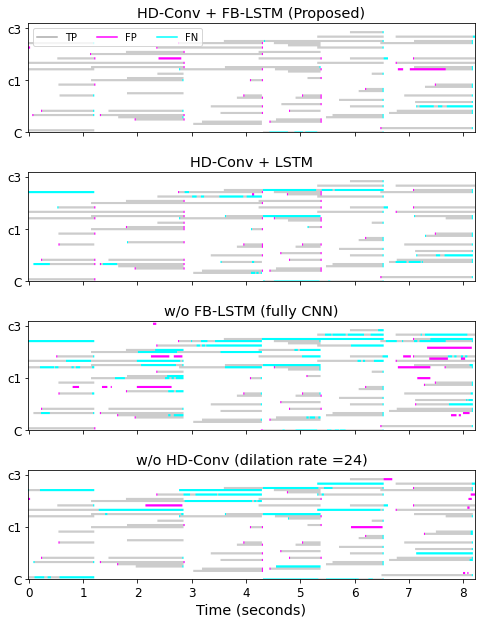

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import numpy as np
import cv2
import librosa
import torch
import nnAudio
import librosa.display

def img_resize(img, ratio = [2,1]):
    # input: [h, w, c]
    new_size = list(img.shape[:2])
    new_size[0] = int(new_size[0] * ratio[0])
    new_size[1] = int(new_size[1] * ratio[1])
    return cv2.resize(img, dsize=new_size[::-1], interpolation=cv2.INTER_NEAREST)

# to_cqt = nnAudio.Spectrogram.CQT(sr=16000, hop_length=320, fmin=27.5, n_bins=88*2, bins_per_octave=2*12, output_format='Magnitude')

dirpath = 'result.png'
# ORIG-MIDI_02_7_10_13_Group_MID--AUDIO_14_R3_2013_wav--2.flac.overlap.note_recall.png
dirpath = 'results/ablation_study/piano_roll/concat/ORIG-MIDI_02_7_10_13_Group_MID--AUDIO_14_R3_2013_wav--2.flac.overlap.note_recall.png'
img = plt.imread(dirpath)
img = img[:,12560:12971,:]
shape = img.shape
# blue = np.concatenate([np.zeros(shape), np.ones(shape), np.zeros(shape), np.ones(shape)])
for i in range(shape[0]):
    for j in range(shape[1]):
        if (img[i, j] == np.array([0., 0., 1., 1.])).all():
            # img[i, j] = [0.5, 0.5, 0.5] + [1.0]
            # img[i, j] = [0.3, 0.3, 0.3] + [0.0]
            # img[i, j] = [0.6, 0.6, 0.6] + [1.0]
            img[i, j] = [0.8, 0.8, 0.8] + [1.0]

# print(img)
print(img.shape)

# # cqt
# sr = 16000
# wav_path = 'data/maestro-v3.0.0/2013/ORIG-MIDI_02_7_10_13_Group_MID--AUDIO_14_R3_2013_wav--2.flac'
# y,sr = librosa.load(wav_path, sr=sr, mono=True, offset=12560*320/sr, duration=(12972-12560)*320/sr)
# cqt = librosa.cqt(y, sr, hop_length=512, fmin=27.5, n_bins=88*2, bins_per_octave=24)
# # cqt = to_cqt(torch.tensor(y)).cpu().numpy()
# cqt = librosa.amplitude_to_db( np.abs(cqt) )
# print('cqt.shape', cqt.shape)


# C1-b4
propsed_result = img[3:87,:,:]
rnn_result = img[88+3:88*2-1,:,:]
wornn_result = img[88*2+3:88*3-1,:,:]
wohd_result = img[88*3+3:88*4-1,:,:]

propsed_result = img_resize(propsed_result)
rnn_result = img_resize(rnn_result)
wornn_result = img_resize(wornn_result)
wohd_result = img_resize(wohd_result)

print(propsed_result.shape)
a = propsed_result[:,:,:]
print(a.shape)

# propsed_result[5, 0: 50, :] = 

mpl.rcParams["font.size"] = 12

fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True, sharex=True, figsize=(8, 10.5)) # 8,9.3
ax[0].imshow(propsed_result)
ax[0].set_ylim(60*2,20)
ax[0].set_title('HD-Conv + FB-LSTM (Proposed)')
ax[0].set_xlabel('')
ax[0].plot([-1], color='#AAAAAA')
ax[0].plot([-1], color='#FF00FF')
ax[0].plot([-1], color='#00FFFF')
ax[0].legend(['TP', 'FP', 'FN'], ncol=3, loc='upper left', fontsize ='small')
plt.yticks([12*2,36*2,60*2], ['c3', 'c1', 'C']) #, fontsize ='x-large'
# ax[0].set_fontsize('x-large')
# ax[0].set_yticks([12*2,36*2,60*2], ['c3', 'c1', 'C'])

# ax[0].xaxis.set_major_locator(plt.MaxNLocator(5))
# f-b4
ax[1].imshow(rnn_result)
ax[1].set_title('HD-Conv + LSTM')
ax[1].set_xlabel('')
ax[2].imshow(wornn_result)
ax[2].set_title('w/o FB-LSTM (fully CNN)')
ax[2].set_xlabel('')
ax[3].imshow(wohd_result)
ax[3].set_title('w/o HD-Conv (dilation rate =24)')
ax[3].set_xticklabels([-1, 0,1,2,3,4,5,6,7,8,9])
# plt.axes([0.1, 0.1, 0.8, 0.4])
# plt.axes()


# librosa.display.specshow(cqt, sr=sr, ax=ax[4]) #, x_axis='time', y_axis='cqt_note'

ax[3].set_xlabel('Time (seconds)', fontsize ='large') #, fontsize ='x-large'
for i in range(4):
    for tic in ax[i].xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
    for tic in ax[i].yaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False

plt.savefig("ablation_study_piano_roll.pdf", dpi=300, bbox_inches='tight')

# plt.savefig("C-b4.png",dpi=300)

In [80]:
print(img[0:100,0,:])

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1.